<a href="https://colab.research.google.com/github/fridymandita/KCBV/blob/main/Filtering_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Filtering Edge Detection

In [1]:
%%capture
!pip install kornia

In [2]:
%%capture
!wget https://github.com/kornia/data/raw/main/doraemon.png

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

In [4]:
img_bgr: np.ndarray = cv2.imread('doraemon.png', cv2.IMREAD_COLOR)

##Convert the numpy array to torch

In [5]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxWx
x_bgr = x_bgr[None,...].float() / 255.

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)
x_gray = K.color.rgb_to_grayscale(x_rgb)

In [6]:
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

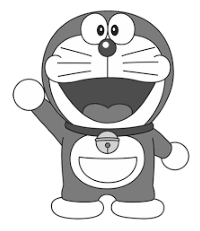

In [7]:
imshow(x_gray)

## 1st order derivates

In [8]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=1)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

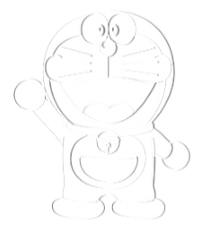

In [9]:
# Show first derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

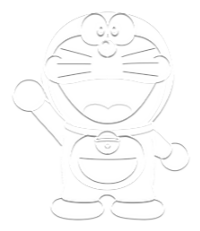

In [10]:
# Show first derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## 2nd order derivatives

In [11]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=2)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

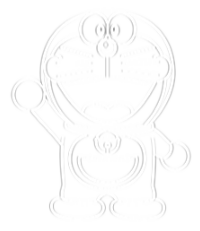

In [12]:
# Show second derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

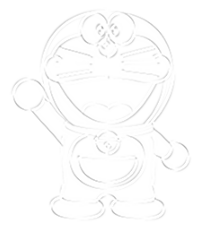

In [13]:
# Show second derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## Sobel Edges

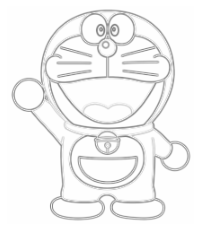

In [14]:
x_sobel: torch.Tensor = K.filters.sobel(x_gray)
imshow(1. - x_sobel)

## Laplacian edges

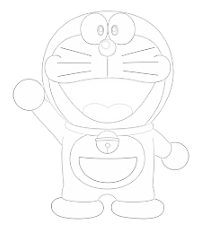

In [15]:
x_laplacian: torch.Tensor = K.filters.laplacian(x_gray, kernel_size=5)
imshow(1. - x_laplacian.clamp(0., 1.))

## Canny edges

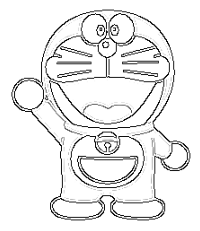

In [16]:
x_laplacian: torch.Tensor = K.filters.canny(x_gray)[0]
imshow(1. - x_laplacian.clamp(0., 1.))